<a href="https://colab.research.google.com/github/NayeemaNonta/RatemyprofessorsMLProject/blob/main/Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Uploading Data and Imports

In [ ]:
# Data Imports
import numpy as np
import pandas as pd
from numpy import mean
from numpy import std

# Math
import math

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context("paper")
sns.despine()
%matplotlib inline

# Machine Learning Imports
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from scipy import linalg

# For evaluating our ML results
from sklearn import metrics
from sklearn.metrics import classification_report

# K-Fold imports source: https://www.askpython.com/python/examples/k-fold-cross-validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score



In [ ]:
# upload data 
from google.colab import files 
uploaded_files = files.upload() # upload file


Saving RateMyProfessor_Sample_data.csv to RateMyProfessor_Sample_data.csv


# Dataset Analysis 

In [ ]:
import io
data = io.BytesIO(uploaded_files['RateMyProfessor_Sample_data.csv']) # read file
# load as a data frame
df = pd.read_csv(data) 

# view the first 5 rows to get an initial idea of the columns
df.head(5)

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# d0 is a copy of the original dataset 
d0 = df.copy()
# Using df.info() to get general overview of dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   professor_name            20000 non-null  object 
 1   school_name               20000 non-null  object 
 2   department_name           20000 non-null  object 
 3   local_name                20000 non-null  object 
 4   state_name                20000 non-null  object 
 5   year_since_first_review   20000 non-null  int64  
 6   star_rating               20000 non-null  float64
 7   take_again                2998 non-null   float64
 8   diff_index                20000 non-null  float64
 9   tag_professor             11093 non-null  object 
 10  num_student               20000 non-null  int64  
 11  post_date                 19995 non-null  object 
 12  name_onlines              20000 non-null  object 
 13  name_not_onlines          19995 non-null  object 
 14  studen

# Data Preprocessing: Step 1
Dropping rows with null value for comments column

In [ ]:
print("Count Before Dropping Rows With No Comments: ")
df.count()

Count Before Dropping Rows With No Comments: 


professor_name              20000
school_name                 20000
department_name             20000
local_name                  20000
state_name                  20000
year_since_first_review     20000
star_rating                 20000
take_again                   2998
diff_index                  20000
tag_professor               11093
num_student                 20000
post_date                   19995
name_onlines                20000
name_not_onlines            19995
student_star                19995
student_difficult           19995
attence                      4009
for_credits                  4053
would_take_agains            2582
grades                       3292
help_useful                 20000
help_not_useful             20000
comments                    19993
word_comment                19993
gender                      20000
race                        20000
asian                       20000
hispanic                    20000
nh_black                    20000
nh_white      

In [ ]:
print("Counting how many rows are null for each variable: \n")
print(df.isnull().sum())

Counting how many rows are null for each variable: 

professor_name                  0
school_name                     0
department_name                 0
local_name                      0
state_name                      0
year_since_first_review         0
star_rating                     0
take_again                  17002
diff_index                      0
tag_professor                8907
num_student                     0
post_date                       5
name_onlines                    0
name_not_onlines                5
student_star                    5
student_difficult               5
attence                     15991
for_credits                 15947
would_take_agains           17418
grades                      16708
help_useful                     0
help_not_useful                 0
comments                        7
word_comment                    7
gender                          0
race                            0
asian                           0
hispanic                     

In [ ]:
# drop any row (axis 0) that has any type of null value
df = df.dropna(subset=['comments'],axis=0) 

print("Count after dropping: \n")
print(df.count())

print("\nComfirming that no comments are null: \n")
print(df.isnull().sum())

Count after dropping: 

professor_name              19993
school_name                 19993
department_name             19993
local_name                  19993
state_name                  19993
year_since_first_review     19993
star_rating                 19993
take_again                   2998
diff_index                  19993
tag_professor               11093
num_student                 19993
post_date                   19993
name_onlines                19993
name_not_onlines            19988
student_star                19993
student_difficult           19993
attence                      4009
for_credits                  4053
would_take_agains            2582
grades                       3292
help_useful                 19993
help_not_useful             19993
comments                    19993
word_comment                19993
gender                      19993
race                        19993
asian                       19993
hispanic                    19993
nh_black                

# Data Preprocessing: Step 2

Dropping rows which have comments consisting of 2 words or less. This eliminates comments which do not add much value (e.g. "no comment", "NO COMMENTS!", etc.) Since these comments do not mean anything and can be said for both high (good) and low (bad) rated professors

In [ ]:
print("Count Before Dropping Rows With 'word_comment' <= 2: \n")
df.count()

Count Before Dropping Rows With 'word_comment' <= 2: 



professor_name              19993
school_name                 19993
department_name             19993
local_name                  19993
state_name                  19993
year_since_first_review     19993
star_rating                 19993
take_again                   2998
diff_index                  19993
tag_professor               11093
num_student                 19993
post_date                   19993
name_onlines                19993
name_not_onlines            19988
student_star                19993
student_difficult           19993
attence                      4009
for_credits                  4053
would_take_agains            2582
grades                       3292
help_useful                 19993
help_not_useful             19993
comments                    19993
word_comment                19993
gender                      19993
race                        19993
asian                       19993
hispanic                    19993
nh_black                    19993
nh_white      

In [ ]:
print("\nCount of Rows With 'word_comment' <= 2: \n")
(df['word_comment'] <= 2).sum()


Count of Rows With 'word_comment' <= 2: 



1411

In [ ]:
df.drop(df.index[df['word_comment'] <= 2], inplace = True)

print("Count After Dropping Rows With 'word_comment' <= 2: \n")
print(df.count())

Count After Dropping Rows With 'word_comment' <= 2: 

professor_name              18582
school_name                 18582
department_name             18582
local_name                  18582
state_name                  18582
year_since_first_review     18582
star_rating                 18582
take_again                   2959
diff_index                  18582
tag_professor               10634
num_student                 18582
post_date                   18582
name_onlines                18582
name_not_onlines            18579
student_star                18582
student_difficult           18582
attence                      3897
for_credits                  4018
would_take_agains            2560
grades                       3216
help_useful                 18582
help_not_useful             18582
comments                    18582
word_comment                18582
gender                      18582
race                        18582
asian                       18582
hispanic                    

# Data Preprocessing: Step 3 (Text Mining)

In [ ]:
from sklearn.feature_extraction import _stop_words
import nltk 
nltk.download('stopwords')

# download list of stop words (very commonly repeated words like the, an, in, etc.)
# nltk.download('stopwords') # have to run once
stopwords = nltk.corpus.stopwords.words('english')

import re,string

# function that takes a string, 
# turns it into lower case and removes stopwords and punctuation
def clean_text(text):
  # remove stopwords
  text = ' '.join([word for word in text.split() if word not in stopwords])
  # remove punctuation (found at string.punctuation)
  text = ''.join([word for word in text if word not in string.punctuation])
  # turn text into lowercase
  text = text.lower()
  # return the clean text
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('averaged_perceptron_tagger')

# initialize a letammatizer (to reduce words to their roots)
wn = nltk.WordNetLemmatizer()

nltk.download('wordnet') # have to run once
nltk.download('omw-1.4') # have to run once
from nltk.corpus import wordnet

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


In [ ]:
# function that takes a string,
# splits it into inidivual words and lemmatizes each one of them,
# return the array as a string to be saved in the dataframe
def lemmatizing(text):
  # split text it into array of inidivual words and lemmatize each one of them
  text = [wn.lemmatize(word) for word in text.split()]
  # return the array as a string
  return str(text)

In [ ]:
# add a 'cleaned_comments' column to the dataframe that stores the clean version of every post
df['cleaned_comments'] = df['comments'].apply(lambda x: clean_text(str(x.strip())))

In [ ]:
# add a 'lemmatized' column to the dataframe that stores the lemmatized words in every post
df['lemmatized'] = df['cleaned_comments'].apply(lambda x: lemmatizing(x))

# show the first 5 rows
df.head()

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline,cleaned_comments,lemmatized
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,this class hard twoinone gened knockout conten...,"['this', 'class', 'hard', 'twoinone', 'gened',..."
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,definitely going choose prof looneys class aga...,"['definitely', 'going', 'choose', 'prof', 'loo..."
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,i overall enjoyed class assignments straightfo...,"['i', 'overall', 'enjoyed', 'class', 'assignme..."
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,yes its possible get a youll definitely work i...,"['yes', 'it', 'possible', 'get', 'a', 'youll',..."
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,1,0,0,0,0,professor looney great knowledge astronomy exp...,"['professor', 'looney', 'great', 'knowledge', ..."


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# initialize a tf-idf vectorizer with english stop words
vectorizer_tfidf1 = TfidfVectorizer(stop_words='english')
vectorizer_tfidf2 = TfidfVectorizer(stop_words='english')

# fit and transform the lemmatized words through the vectorizer
vector_tfidf = vectorizer_tfidf2.fit_transform(df['lemmatized'])


# Data Preprocessing: Step 4 (Binary Classification Datasets)
Dropping rows that have a value of 3 in the 'student_star' column 

In [ ]:
#Converting 'student_star' from float to int 
df['student_star'] = df['student_star'].astype('int')
df[['student_star']]

,student_star
0,5
1,5
2,4
3,5
4,5
...,...
19995,1
19996,2
19997,5
19998,4


In [ ]:
dbinary = df.copy()
print("Count Before Dropping Rows With 'student_star' = 3: \n")
print(dbinary.count())

print("\nCount of Rows With 'student_star' = 3: \n")
(dbinary['student_star']== 3).sum()

Count Before Dropping Rows With 'student_star' = 3: 

professor_name              18582
school_name                 18582
department_name             18582
local_name                  18582
state_name                  18582
year_since_first_review     18582
star_rating                 18582
take_again                   2959
diff_index                  18582
tag_professor               10634
num_student                 18582
post_date                   18582
name_onlines                18582
name_not_onlines            18579
student_star                18582
student_difficult           18582
attence                      3897
for_credits                  4018
would_take_agains            2560
grades                       3216
help_useful                 18582
help_not_useful             18582
comments                    18582
word_comment                18582
gender                      18582
race                        18582
asian                       18582
hispanic                    

2361

In [ ]:
dbinary.drop(dbinary.index[dbinary['student_star'] == 3], inplace = True)

print("Count After Dropping Rows With 'student_star' = 3: \n")
print(dbinary.count())

Count After Dropping Rows With 'student_star' = 3: 

professor_name              16221
school_name                 16221
department_name             16221
local_name                  16221
state_name                  16221
year_since_first_review     16221
star_rating                 16221
take_again                   2601
diff_index                  16221
tag_professor                9295
num_student                 16221
post_date                   16221
name_onlines                16221
name_not_onlines            16218
student_star                16221
student_difficult           16221
attence                      3391
for_credits                  3473
would_take_agains            2285
grades                       2789
help_useful                 16221
help_not_useful             16221
comments                    16221
word_comment                16221
gender                      16221
race                        16221
asian                       16221
hispanic                    1

In [ ]:
# create tfidf vector excluding rows with star rating = 3
vector_tfidf_binary = vectorizer_tfidf1.fit_transform(dbinary['lemmatized'])

# Data Preprocessing: Step 5 (Binary Classification Datasets) 
**Binary Classification: Is_Good_Professor**

Class label: *Is_Good_Professor*


> Assigning Boolean value 1 to 'student_star' = 4 and 'student_star' = 5

> Assigning Boolean value 0 to 'student_star' = 1 and 'student_star' = 2


**Binary Classification: Is_Bad_Professor**

Class label: *Is_Bad_Professor*

> Assigning Boolean value 1 to 'student_star' = 1 and 'student_star' = 2 

> Assigning Boolean value 0 to 'student_star' = 4 and 'student_star' = 5 

In [ ]:
#d1 is dataset for model 1 
d1 = dbinary.copy()
#d2 is dataset for model 2
d2 = dbinary.copy()

In [ ]:
d1['student_star'] = d1.student_star.map({5:1, 4:1, 1:0, 2:0})
#print(d1.shape)
d1[['professor_name', 'student_star', 'comments']]

,professor_name,student_star,comments
0,Leslie Looney,1,"This class is hard, but its a two-in-one gen-e..."
1,Leslie Looney,1,Definitely going to choose Prof. Looney\'s cla...
2,Leslie Looney,1,I overall enjoyed this class because the assig...
3,Leslie Looney,1,"Yes, it\'s possible to get an A but you\'ll de..."
4,Leslie Looney,1,Professor Looney has great knowledge in Astron...
...,...,...,...
19995,Dennis Richardson,0,Great sense of humor!!!! Love parasites now!!!!!
19996,Dennis Richardson,0,he is a really nice guy and is really funny..h...
19997,Dennis Richardson,1,His parasitology class is a lot of work but he...
19998,Dennis Richardson,1,He is WAY too much work for a 1 credit class. ...


In [ ]:
d2['student_star'] = d2.student_star.map({5:0, 4:0, 1:1, 2:1})
d2[['professor_name', 'student_star', 'comments']]

,professor_name,student_star,comments
0,Leslie Looney,0,"This class is hard, but its a two-in-one gen-e..."
1,Leslie Looney,0,Definitely going to choose Prof. Looney\'s cla...
2,Leslie Looney,0,I overall enjoyed this class because the assig...
3,Leslie Looney,0,"Yes, it\'s possible to get an A but you\'ll de..."
4,Leslie Looney,0,Professor Looney has great knowledge in Astron...
...,...,...,...
19995,Dennis Richardson,1,Great sense of humor!!!! Love parasites now!!!!!
19996,Dennis Richardson,1,he is a really nice guy and is really funny..h...
19997,Dennis Richardson,0,His parasitology class is a lot of work but he...
19998,Dennis Richardson,0,He is WAY too much work for a 1 credit class. ...


# Exploratory Data Analysis

[Seaborn Aesthetics](https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/)

[Seaborn Plots](https://seaborn.pydata.org/generated/seaborn.catplot.html?highlight=title)

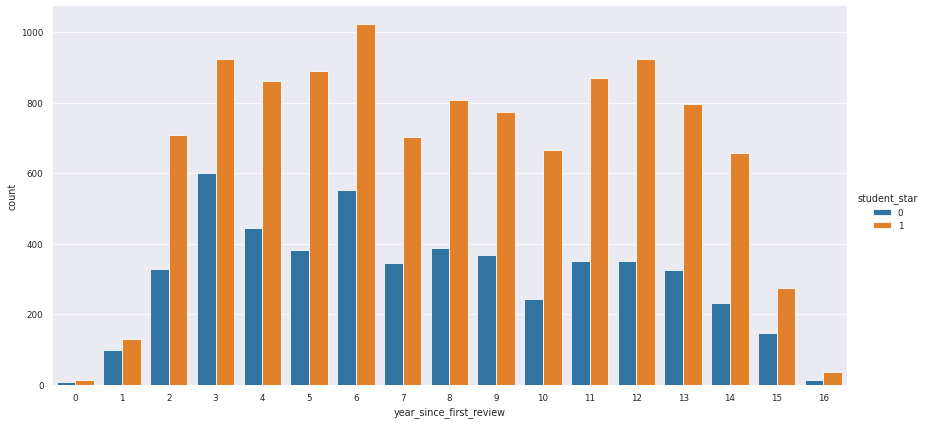

In [ ]:
#Plot showing if how long professors has been on the website affects if tey get more good or bad reviews
p1 = sns.catplot(x='year_since_first_review',kind='count',data=d1,hue='student_star', height=6, aspect=2)

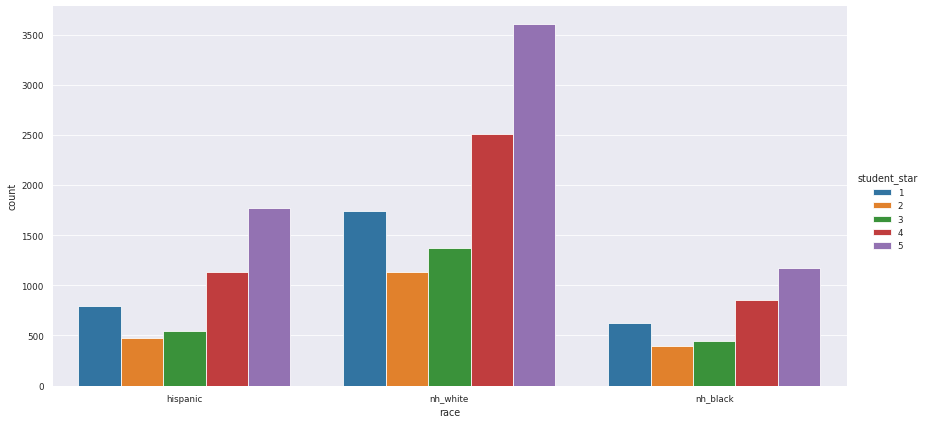

In [ ]:
#Plot showing the distribution of ratings based on race 
p2 = sns.catplot(x='race',kind='count',data=df,hue='student_star', height=6, aspect=2)

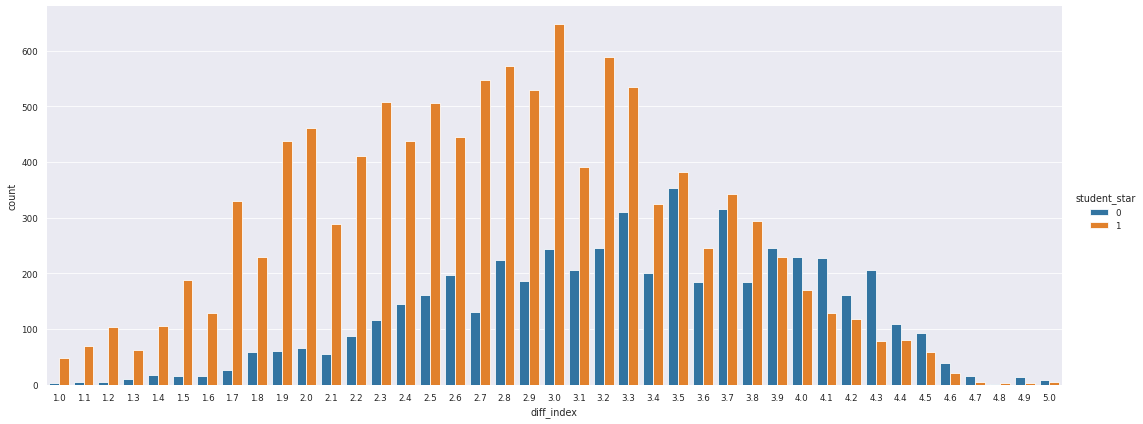

In [ ]:
#Plot showing the distribution of good and bad ratings based on diff_index
p3 = sns.catplot(x='diff_index',kind='count',data=d1,hue='student_star', height=6, aspect=2.5)

# Learning Task 1: Logistic Regression Model (Binary Classifiers)


**Binary Classification Models**

In [ ]:
# Create train/test split for data 
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(vector_tfidf_binary, d1['student_star'])
x2_train, x2_test, y2_train, y2_test = train_test_split(vector_tfidf_binary, d2['student_star'])

Model 1 -  **Binary Classification: Is_Good_Professor**

In [ ]:
# Create LogisticRegression model
Is_Good_Professor = LogisticRegression()
Is_Good_Professor.fit(x1_train, y1_train)
# Predict the classes of the testing data set
class_predict_good_prof = Is_Good_Professor.predict(x1_test)

Model 2 - **Binary Classification: Is_Bad_Professor**

In [ ]:
# Create LogisticRegression model
Is_Bad_Professor = LogisticRegression()
Is_Bad_Professor.fit(x2_train, y2_train)
# Predict the classes of the testing data set
class_predict_bad_prof = Is_Bad_Professor.predict(x2_test)

# Results Learning Task 1 (Is_Good_Professor)

Results: **Is_Good_Professor**

In [ ]:
# get array of words from tfidf vectors
words = vectorizer_tfidf1.get_feature_names()
print("Words list length: ", len(words))
print("TF-IDF array size: ",vector_tfidf_binary.toarray().size)
# get list of coefficients from model 
coeff = Is_Good_Professor.coef_
print("Coefficients array size: ", coeff.size)
coeff = coeff.reshape(-1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Words list length:  16680
TF-IDF array size:  270566280
Coefficients array size:  16680


In [ ]:
print("Word with the highest coefficient: ", words[np.argmax(coeff)])
# Output array of top 10 words with the highest coefficients
idx = np.argsort(coeff)[-10:]
words = np.array(words)
words[idx]

Word with the highest coefficient:  great


array(['fair', 'love', 'fun', 'excellent', 'wonderful', 'easy', 'amazing',
       'awesome', 'best', 'great'], dtype='<U61')

In [ ]:
# Output array of words with the lowest coefficients 
neg_idx = np.argsort(coeff)[:10]
words = np.array(words)
words[neg_idx]

array(['worst', 'horrible', 'avoid', 'rude', 'doesnt', 'terrible',
       'unclear', 'confusing', 'awful', 'boring'], dtype='<U61')

Results: **Is_Bad_Professor**

In [ ]:
# get list of coefficients from model 
coeff = Is_Bad_Professor.coef_
print("Coefficients array size: ", coeff.size)
coeff = coeff.reshape(-1)

print("\nWord with the highest coefficient: ", words[np.argmax(coeff)])
idx = np.argsort(coeff)[-10:]
words = np.array(words)
words[idx]

Coefficients array size:  16680

Word with the highest coefficient:  worst


array(['boring', 'unclear', 'confusing', 'awful', 'rude', 'doesnt',
       'terrible', 'avoid', 'horrible', 'worst'], dtype='<U61')

In [ ]:
# Output array of words with the lowest coefficients 
neg_idx = np.argsort(coeff)[:10]
words = np.array(words)
words[neg_idx]

array(['great', 'best', 'awesome', 'amazing', 'easy', 'fun', 'wonderful',
       'willing', 'dr', 'love'], dtype='<U61')

# Model Evaluation Learning Task 1 (Is_Good_Professor)


**Binary Classification: Is_Good_Professor**


---



In [ ]:
y1_pred = class_predict_good_prof

1. Confusion Matrix

Text(0.5, 41.83333333333333, 'Predicted label')

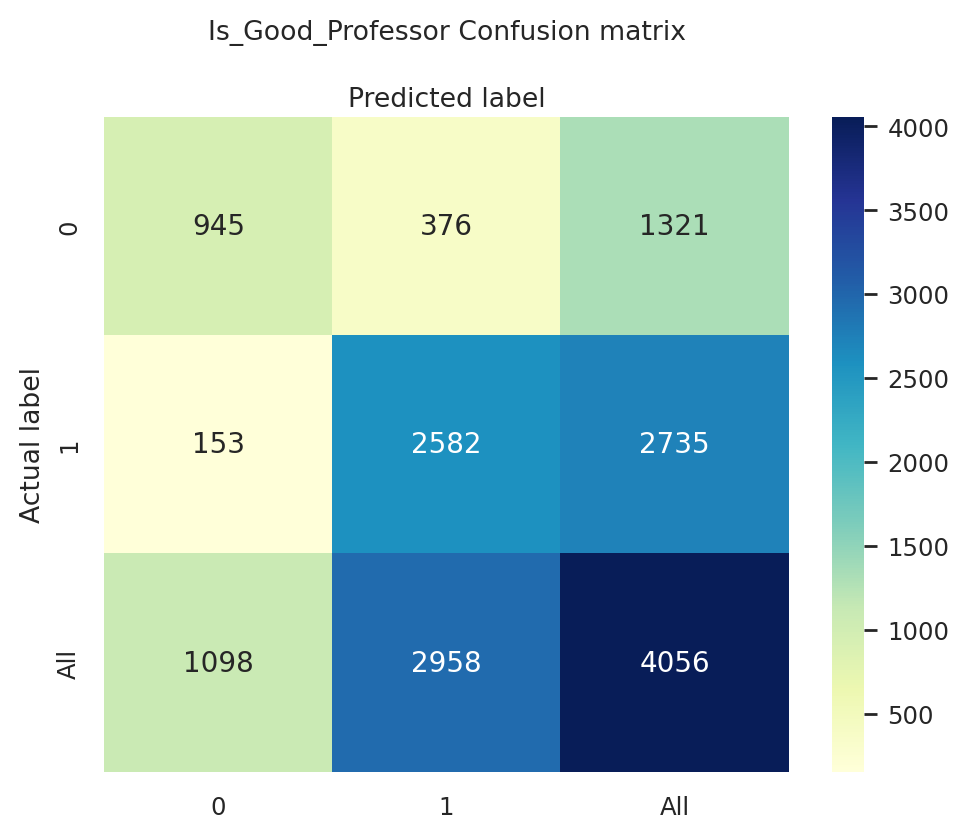

In [ ]:
# regular confusion matrix 
cm = pd.crosstab(y1_test,y1_pred,rownames=['True'],colnames=['Predicted'],margins=True)

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Is_Good_Professor Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 41.83333333333333, 'Predicted label')

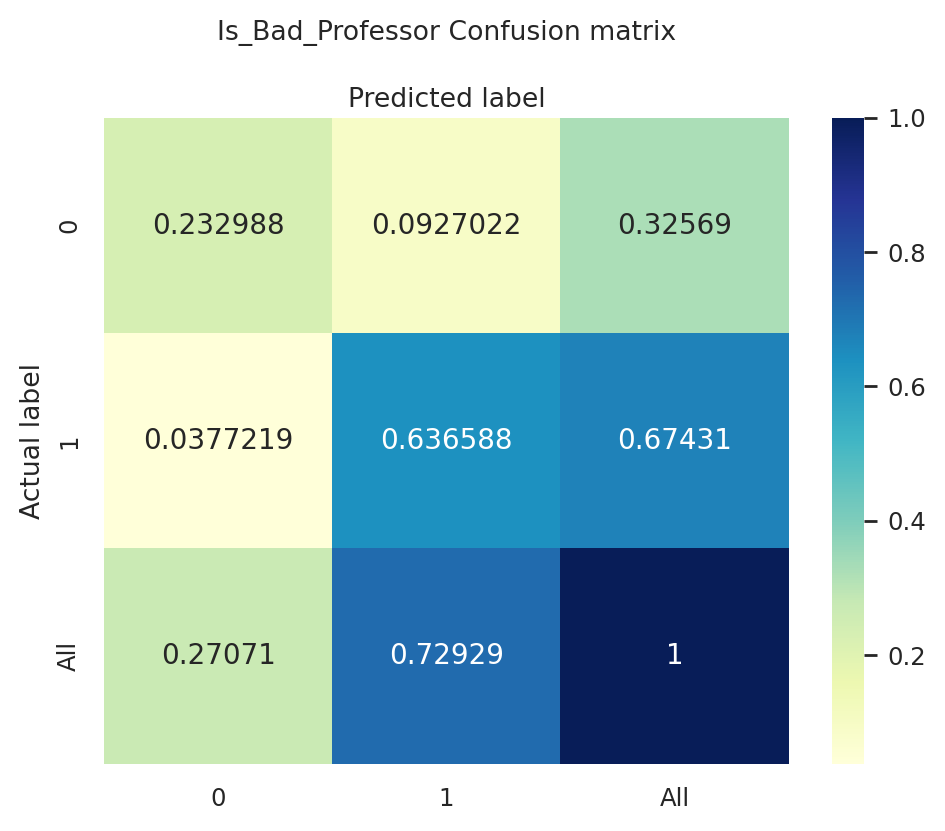

In [ ]:
# normalized confusion matrix
cm = pd.crosstab(y1_test,y1_pred,rownames=['True'],colnames=['Predicted'], normalize=True, margins = True)

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Is_Bad_Professor Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

2. Classification Report














In [ ]:
# generate and print the classification report for model 1
print(classification_report(y1_test,y1_pred))
print("\nAccuracy:", metrics.accuracy_score(y1_test, y1_pred))
print('Precision Score',metrics.precision_score(y1_test,y1_pred))
print('Recall Score', metrics.recall_score(y1_test,y1_pred))
print('F1 Score',metrics.f1_score(y1_test,y1_pred))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78      1321
           1       0.87      0.94      0.91      2735

    accuracy                           0.87      4056
   macro avg       0.87      0.83      0.84      4056
weighted avg       0.87      0.87      0.87      4056


Accuracy: 0.8695759368836292
Precision Score 0.8728870858688302
Recall Score 0.9440585009140768
F1 Score 0.9070788687862287


3. K-Fold Cross Validation

In [ ]:
# K-Fold Cross Validation Source: https://www.askpython.com/python/examples/k-fold-cross-validation
folds = [10,25, 50, 100]
X1 = vector_tfidf_binary
Y1 = d1['student_star']
Is_Good_Professor_Cv = LogisticRegression()
means = list()
for i in folds: 
  kf = KFold(n_splits= i, random_state=None)
  result_Is_Good_Professor_Cv = cross_val_score(Is_Good_Professor_Cv , X1, Y1, cv = kf)
  print("\nFor ", i, "folds: \n")
  print("Accuracy of each fold: \n", result_Is_Good_Professor_Cv)
  print("Average accuracy: {}".format(result_Is_Good_Professor_Cv.mean()))
  means.append(result_Is_Good_Professor_Cv.mean())



For  10 folds: 

Accuracy of each fold: 
 [0.8650647  0.86929716 0.86128237 0.87669544 0.88532676 0.87361282
 0.8674476  0.87361282 0.88224414 0.88779285]
Average accuracy: 0.8742376655551782

For  25 folds: 

Accuracy of each fold: 
 [0.84745763 0.86902928 0.89984592 0.87211094 0.86286595 0.85978428
 0.85824345 0.87365177 0.87827427 0.87673344 0.87057011 0.89676425
 0.89060092 0.86902928 0.8798151  0.88289676 0.83975347 0.87827427
 0.86748844 0.90446841 0.89830508 0.88425926 0.87037037 0.88734568
 0.87808642]
Average accuracy: 0.8758409899370351

For  50 folds: 

Accuracy of each fold: 
 [0.86769231 0.84307692 0.85538462 0.88923077 0.89846154 0.89538462
 0.87384615 0.87692308 0.87076923 0.85846154 0.86461538 0.86153846
 0.85846154 0.86769231 0.87076923 0.87384615 0.86769231 0.88615385
 0.85538462 0.89538462 0.87692308 0.87345679 0.88888889 0.90740741
 0.88888889 0.89506173 0.87037037 0.85802469 0.87962963 0.88580247
 0.88888889 0.87037037 0.86728395 0.83024691 0.90432099 0.85185185
 


**Binary Classification: Is_Bad_Professor**

---



In [ ]:
y2_pred = class_predict_bad_prof

1. Confusion Matrix

Text(0.5, 41.83333333333333, 'Predicted label')

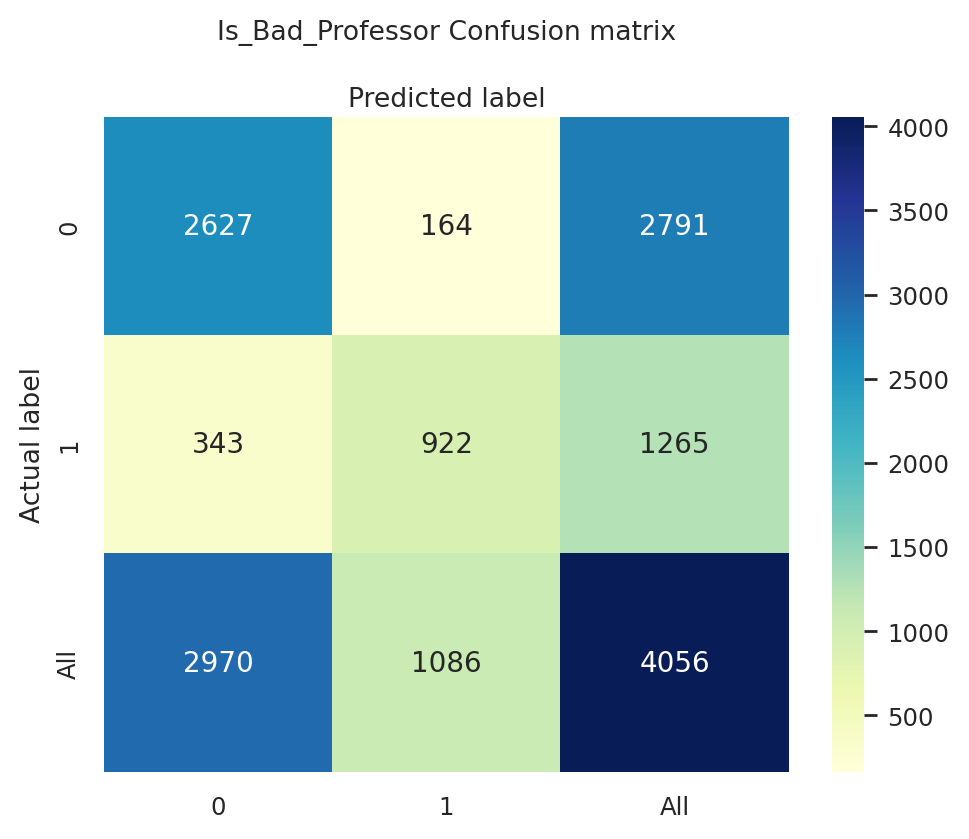

In [ ]:
# regular confusion matrix 
cm = pd.crosstab(y2_test,y2_pred,rownames=['True'],colnames=['Predicted'],margins=True)

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Is_Bad_Professor Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 41.83333333333333, 'Predicted label')

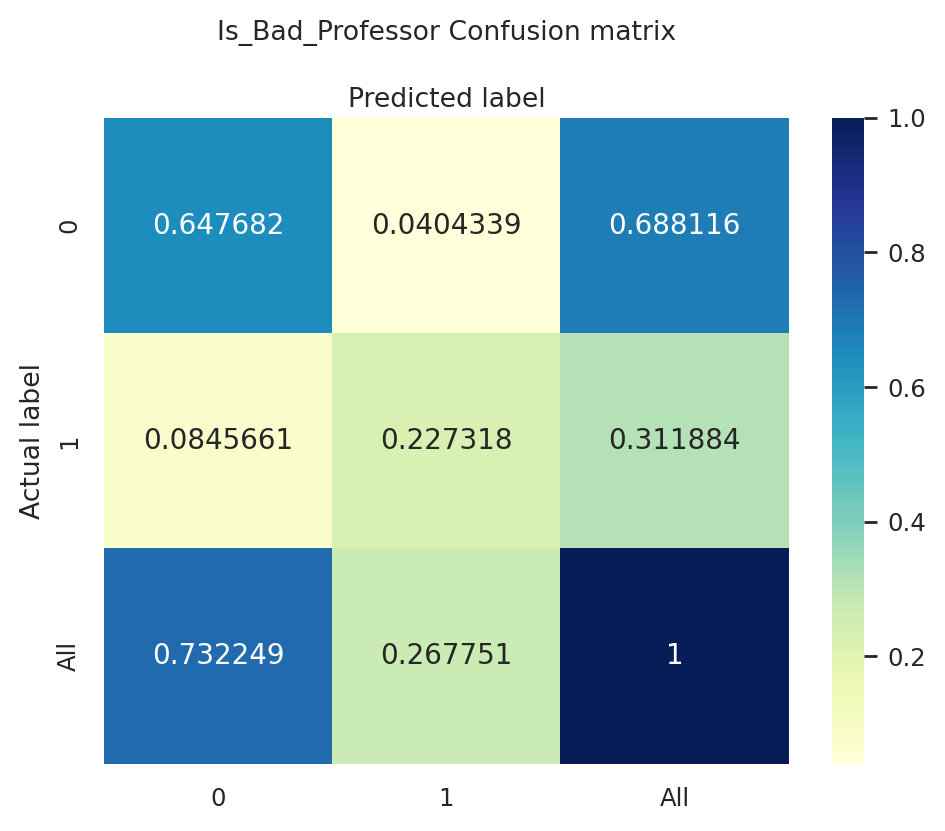

In [ ]:
# normalized confusion matrix
cm = pd.crosstab(y2_test,y2_pred,rownames=['True'],colnames=['Predicted'], normalize=True, margins = True)

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Is_Bad_Professor Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

2. Classification Report

In [ ]:
# generate and print the classification report for model 2
print(classification_report(y2_test,y2_pred))
print("\nAccuracy:", metrics.accuracy_score(y2_test, y2_pred))
print('Precision Score',metrics.precision_score(y2_test,y2_pred))
print('Recall Score', metrics.recall_score(y2_test,y2_pred))
print('F1 Score',metrics.f1_score(y2_test,y2_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      2791
           1       0.85      0.73      0.78      1265

    accuracy                           0.88      4056
   macro avg       0.87      0.84      0.85      4056
weighted avg       0.87      0.88      0.87      4056


Accuracy: 0.875
Precision Score 0.848987108655617
Recall Score 0.7288537549407115
F1 Score 0.7843470863462356


3. K-Fold Cross Validation

In [ ]:
# K-Fold Cross Validation Source: https://www.askpython.com/python/examples/k-fold-cross-validation
folds = [10,25, 50, 100]
X2 = vector_tfidf_binary
Y2 = d2['student_star']
Is_Bad_Professor_Cv = LogisticRegression()
for i in folds: 
  kf = KFold(n_splits= i, random_state=None)
  result_Is_Bad_Professor_Cv = cross_val_score(Is_Good_Professor_Cv , X2, Y2, cv = kf)
  print("\nFor ", i, "folds: \n")
  print("Accuracy of each fold: \n", result_Is_Bad_Professor_Cv)
  print("\nAverage accuracy: {}".format(result_Is_Bad_Professor_Cv.mean()))


For  10 folds: 

Accuracy of each fold: 
 [0.8650647  0.86929716 0.86128237 0.87669544 0.88532676 0.87361282
 0.8674476  0.87361282 0.88224414 0.88779285]

Average accuracy: 0.8742376655551782

For  25 folds: 

Accuracy of each fold: 
 [0.84745763 0.86902928 0.89984592 0.87211094 0.86286595 0.85978428
 0.85824345 0.87365177 0.87827427 0.87673344 0.87057011 0.89676425
 0.89060092 0.86902928 0.8798151  0.88289676 0.83975347 0.87827427
 0.86748844 0.90446841 0.89830508 0.88425926 0.87037037 0.88734568
 0.87808642]

Average accuracy: 0.8758409899370351

For  50 folds: 

Accuracy of each fold: 
 [0.86769231 0.84307692 0.85538462 0.88923077 0.89846154 0.89538462
 0.87384615 0.87692308 0.87076923 0.85846154 0.86461538 0.86153846
 0.85846154 0.86769231 0.87076923 0.87384615 0.86769231 0.88615385
 0.85538462 0.89538462 0.87692308 0.87345679 0.88888889 0.90740741
 0.88888889 0.89506173 0.87037037 0.85802469 0.87962963 0.88580247
 0.88888889 0.87037037 0.86728395 0.83024691 0.90432099 0.85185185

# Learning Tasks 2 & 3: Logistic Regression Model  (Multinomial Classifiers)

**Multinomial Classification Models**

Model 3 - **Multinomial Classification: Professor_Star_Rating**

In [ ]:
# Create train/test split for data 
from sklearn.model_selection import train_test_split
x3_train, x3_test, y3_train, y3_test = train_test_split(vector_tfidf, df['student_star'])

In [ ]:
# Multinomial logisitc regression reference source: https://dataaspirant.com/implement-multinomial-logistic-regression-python/ 
# Building multinomial logisitc regression model 
Professor_Star_Rating = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(x3_train, y3_train)
# Predict the classes of the testing data set
class_predict_prof_star_rating = Professor_Star_Rating.predict(x3_test)

Model 4 - **Multinomial Classification: Best_Worst_Average_Prof**

In [ ]:
d4 = df.copy()
d4['student_star'] = d4.student_star.map({5:2,4:1,1:0,2:1,3:1})
d4[['professor_name', 'student_star', 'comments']]

,professor_name,student_star,comments
0,Leslie Looney,2,"This class is hard, but its a two-in-one gen-e..."
1,Leslie Looney,2,Definitely going to choose Prof. Looney\'s cla...
2,Leslie Looney,1,I overall enjoyed this class because the assig...
3,Leslie Looney,2,"Yes, it\'s possible to get an A but you\'ll de..."
4,Leslie Looney,2,Professor Looney has great knowledge in Astron...
...,...,...,...
19995,Dennis Richardson,0,Great sense of humor!!!! Love parasites now!!!!!
19996,Dennis Richardson,1,he is a really nice guy and is really funny..h...
19997,Dennis Richardson,2,His parasitology class is a lot of work but he...
19998,Dennis Richardson,1,He is WAY too much work for a 1 credit class. ...


In [ ]:
# Create train/test split for data 
from sklearn.model_selection import train_test_split
x4_train, x4_test, y4_train, y4_test = train_test_split(vector_tfidf, d4['student_star'])

In [ ]:
# Multinomial logisitc regression reference source: https://dataaspirant.com/implement-multinomial-logistic-regression-python/ 
# Building multinomial logisitc regression model 
Best_Worst_Average_Prof = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(x4_train, y4_train)
# Predict the classes of the testing data set
class_predict_Best_Worst_Average_Prof = Best_Worst_Average_Prof.predict(x4_test)

# Results Learning Task 2 (Professor_Star_Rating)  

In [ ]:
# get array of words from tfidf vectors
words = vectorizer_tfidf2.get_feature_names()
print("Words list length: ", len(words))
print("TF-IDF array size: ",vector_tfidf.toarray().size)
# get list of coefficients from model 
coeff = Professor_Star_Rating.coef_
print("Coefficients array size: ", coeff.size)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Words list length:  18100
TF-IDF array size:  336334200
Coefficients array size:  90500


In [ ]:
# Output array of top 10 words with the highest coefficients
ratings = [0,1,2,3,4]
words = np.array(words)
for i in ratings: 
  idx = np.argsort(coeff[i])
  idx = idx[-10:]
  print ("\nTop 10 words with highest coefficients for student_star = ", i+1, ": ")
  print (words[idx])


Top 10 words with highest coefficients for student_star =  1 : 
['away' 'unclear' 'doesnt' 'unhelpful' 'terrible' 'awful' 'rude'
 'horrible' 'avoid' 'worst']

Top 10 words with highest coefficients for student_star =  2 : 
['explanation' 'horrible' 'avoid' 'unorganized' 'doesnt' 'boring'
 'confusing' 'worst' 'unclear' 'ramble']

Top 10 words with highest coefficients for student_star =  3 : 
['hw' 'pretty' 'dry' 'attendance' 'lot' 'arent' 'hard' 'alright' 'overall'
 'ok']

Top 10 words with highest coefficients for student_star =  4 : 
['cool' 'participate' 'enjoyed' 'fair' 'easy' 'willing' 'amazing' 'best'
 'awesome' 'great']

Top 10 words with highest coefficients for student_star =  5 : 
['nicest' 'hilarious' 'loved' 'fun' 'excellent' 'wonderful' 'amazing'
 'awesome' 'great' 'best']


In [ ]:
# Output array of words with the lowest coefficients 
for i in ratings:
  neg_idx = np.argsort(coeff[i])
  neg_idx = neg_idx[:10]
  print ("\nTop 10 words with lowest coefficients for star_rating = ", i+1, ": ")
  print (words[neg_idx])


Top 10 words with lowest coefficients for star_rating =  1 : 
['great' 'best' 'easy' 'lot' 'awesome' 'willing' 'love' 'amazing' 'nice'
 'interesting']

Top 10 words with lowest coefficients for star_rating =  2 : 
['great' 'awesome' 'loved' 'fair' 'best' 'professor' 'fun' 'cool' 'dr'
 'amazing']

Top 10 words with lowest coefficients for star_rating =  3 : 
['helpful' 'amazing' 'life' 'best' 'worst' 'awesome' 'ive' 'job'
 'excellent' 'prof']

Top 10 words with lowest coefficients for star_rating =  4 : 
['avoid' 'worst' 'horrible' 'doesnt' 'confusing' 'rude' 'waste' 'useless'
 'unclear' 'luck']

Top 10 words with lowest coefficients for star_rating =  5 : 
['worst' 'unclear' 'confusing' 'terrible' 'horrible' 'rude' 'boring'
 'doesnt' 'hard' 'avoid']


# Model Evaluation Learning Task 2 (Professor_Star_Rating)

**Multinomial Classification: Professor_Star_Rating**


---



In [ ]:
y3_pred = class_predict_prof_star_rating

1. Confusion Matrix

Text(0.5, 41.83333333333333, 'Predicted label')

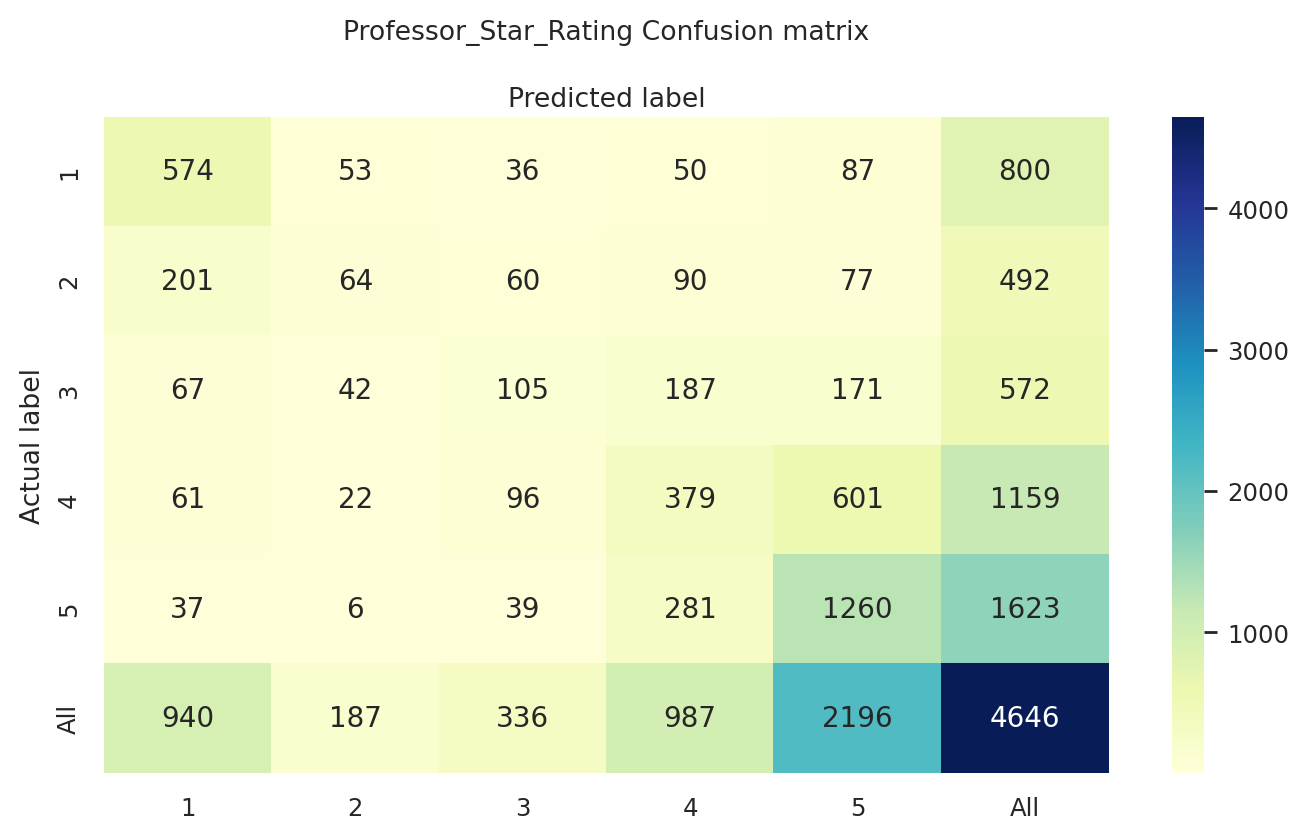

In [ ]:
# regular confusion matrix 
cm = pd.crosstab(y3_test,y3_pred,rownames=['True'],colnames=['Predicted'],margins=True)

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Professor_Star_Rating Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 41.83333333333333, 'Predicted label')

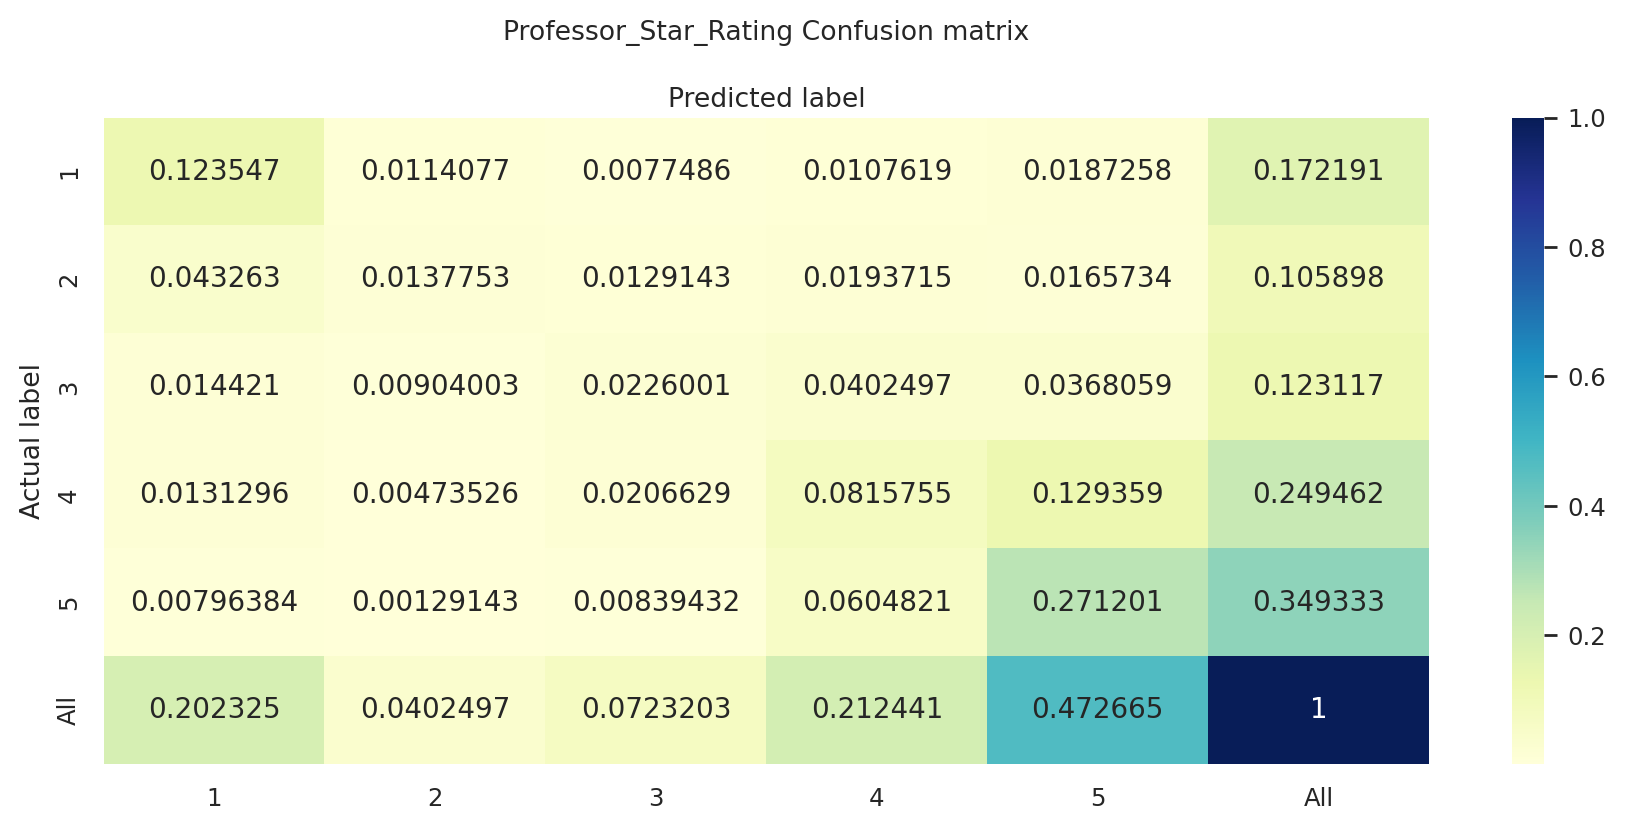

In [ ]:
# normalized confusion matrix
cm = pd.crosstab(y3_test,y3_pred,rownames=['True'],colnames=['Predicted'], normalize=True, margins = True)

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(9,4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Professor_Star_Rating Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

2. Classification Report

In [ ]:
# generate and print the classification report for model 3
print(classification_report(y3_test,y3_pred))
print("\nAccuracy:", metrics.accuracy_score(y3_test, y3_pred))
print('Precision Score',metrics.precision_score(y3_test,y3_pred, average="weighted"))
print('Recall Score', metrics.recall_score(y3_test,y3_pred, average="weighted"))
print('F1 Score',metrics.f1_score(y3_test,y3_pred, average="weighted"))

              precision    recall  f1-score   support

           1       0.61      0.72      0.66       800
           2       0.34      0.13      0.19       492
           3       0.31      0.18      0.23       572
           4       0.38      0.33      0.35      1159
           5       0.57      0.78      0.66      1623

    accuracy                           0.51      4646
   macro avg       0.44      0.43      0.42      4646
weighted avg       0.48      0.51      0.48      4646


Accuracy: 0.5126990959965562
Precision Score 0.47609164423352446
Recall Score 0.5126990959965562
F1 Score 0.48066767648740616


3. K-Fold Cross Validation

In [ ]:
folds = [10,25, 50, 100]
Professor_Star_Rating_Cv = LogisticRegression(multi_class='multinomial', solver='newton-cg')
X3 = vector_tfidf
Y3 = df['student_star']

for i in folds: 
  kf = KFold(n_splits= i, random_state=None)
  result_Professor_Star_Rating_Cv = cross_val_score(Professor_Star_Rating_Cv , X3, Y3, cv = kf)
  print("\nFor ", i, "folds: \n")
  print("Accuracy of each fold: \n", result_Professor_Star_Rating_Cv)
  print("\nAverage accuracy: {}".format(result_Professor_Star_Rating_Cv.mean()))


For  10 folds: 

Accuracy of each fold: 
 [0.50457235 0.49919311 0.52744887 0.50753498 0.52691066 0.5247578
 0.50592034 0.49677072 0.49623251 0.51345533]

Average accuracy: 0.5102796681665606

For  25 folds: 

Accuracy of each fold: 
 [0.50672043 0.51747312 0.52419355 0.50537634 0.46774194 0.53494624
 0.50268817 0.49798116 0.50471063 0.51547779 0.54643338 0.50605653
 0.54508748 0.49528937 0.54239569 0.52489906 0.48855989 0.47240915
 0.48452221 0.50201884 0.49663526 0.51009421 0.5141319  0.51816958
 0.48183042]

Average accuracy: 0.5082336936858709

For  50 folds: 

Accuracy of each fold: 
 [0.52419355 0.50268817 0.50537634 0.52688172 0.50537634 0.55107527
 0.49193548 0.52419355 0.47849462 0.47043011 0.54301075 0.53494624
 0.5188172  0.48924731 0.53494624 0.47580645 0.5188172  0.49731183
 0.50268817 0.53763441 0.56451613 0.52688172 0.50268817 0.51344086
 0.52956989 0.56989247 0.51344086 0.46774194 0.54032258 0.55913978
 0.57258065 0.47580645 0.5309973  0.4393531  0.47978437 0.47169811


# Results Learning Task 3 (Best_Worst_Average_Prof)

In [ ]:
# get array of words from tfidf vectors
words = vectorizer_tfidf2.get_feature_names()
print("Words list length: ", len(words))
print("TF-IDF array size: ",vector_tfidf.toarray().size)
# get list of coefficients from model 
coeff = Best_Worst_Average_Prof.coef_
print("Coefficients array size: ", coeff.size)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Words list length:  18100
TF-IDF array size:  336334200
Coefficients array size:  54300


In [ ]:
# Output array of top 10 words with the highest coefficients
ratings_class = [0,1,2]
ratings_class_string = ["Worst", "Average", "Best"]
words = np.array(words)
for i in ratings_class: 
  idx = np.argsort(coeff[i])
  idx = idx[-10:]
  print ("\nTop 10 words with highest coefficients for rating class =",ratings_class_string[i], ": ")
  print (words[idx])


Top 10 words with highest coefficients for rating class = Worst : 
['useless' 'unhelpful' 'terrible' 'awful' 'doesnt' 'unclear' 'avoid'
 'rude' 'horrible' 'worst']

Top 10 words with highest coefficients for rating class = Average : 
['approach' 'alot' 'willing' 'ok' 'lot' 'nice' 'overall' 'okay' 'pretty'
 'alright']

Top 10 words with highest coefficients for rating class = Best : 
['hilarious' 'fun' 'dr' 'easy' 'wonderful' 'excellent' 'amazing' 'awesome'
 'best' 'great']


In [ ]:
# Output array of words with the lowest coefficients 
for i in ratings_class:
  neg_idx = np.argsort(coeff[i])
  neg_idx = neg_idx[:10]
  print ("\nTop 10 words with highest coefficients for rating class =",ratings_class_string[i], ": ")
  print (words[neg_idx])


Top 10 words with highest coefficients for rating class = Worst : 
['great' 'best' 'easy' 'awesome' 'amazing' 'dr' 'lot' 'fun' 'willing'
 'funny']

Top 10 words with highest coefficients for rating class = Average : 
['worst' 'wish' 'retire' 'power' 'helpfull' 'tell' 'paid' 'rock'
 'unhelpful' 'prof']

Top 10 words with highest coefficients for rating class = Best : 
['worst' 'horrible' 'rude' 'terrible' 'unclear' 'confusing' 'avoid'
 'doesnt' 'boring' 'awful']


# Model Evaluation Learning Task 3 (Best_Worst_Average_Prof) 

**Multinomial Classification: Professor_Star_Rating**


---



In [ ]:
y4_pred = class_predict_Best_Worst_Average_Prof

1. Confusion Matrix

Text(0.5, 41.83333333333333, 'Predicted label')

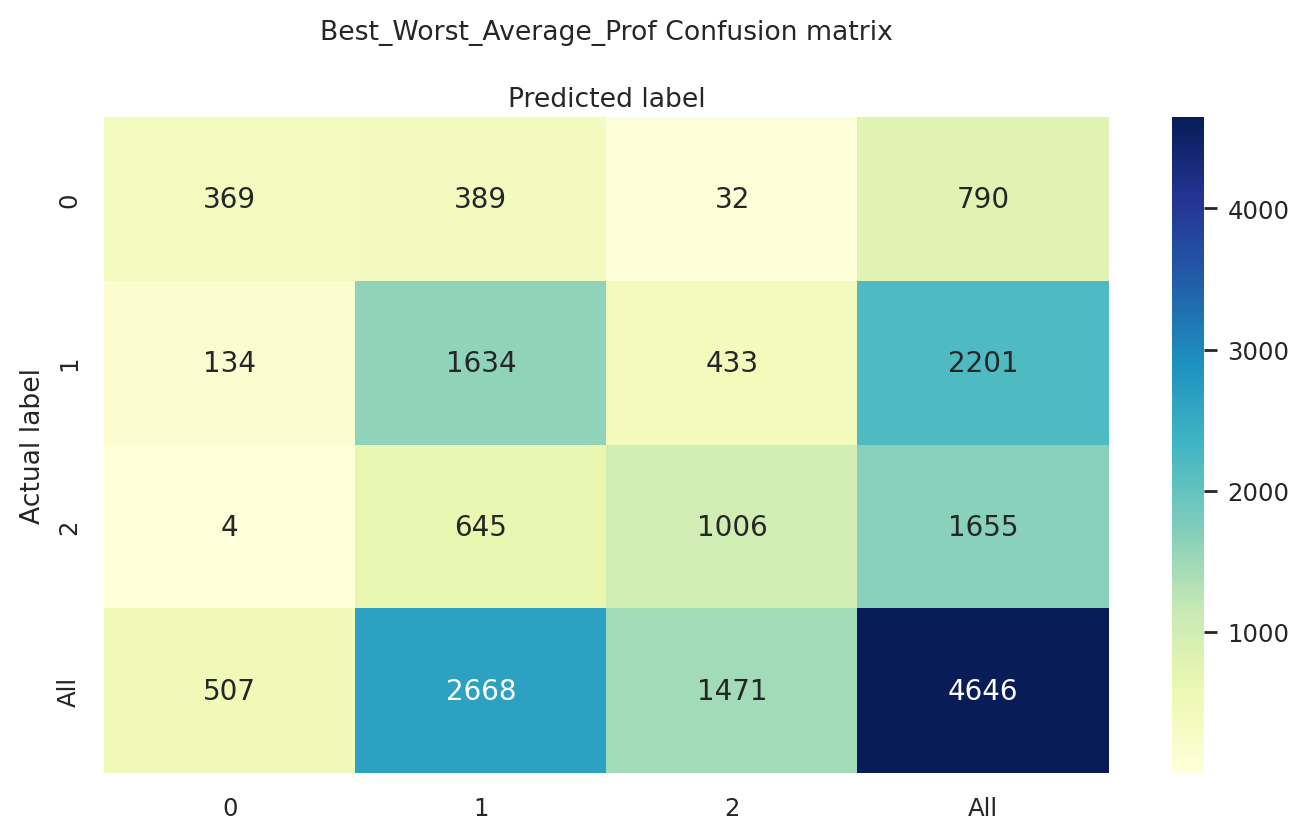

In [ ]:
# regular confusion matrix 
cm = pd.crosstab(y4_test,y4_pred,rownames=['True'],colnames=['Predicted'],margins=True)

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Best_Worst_Average_Prof Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 41.83333333333333, 'Predicted label')

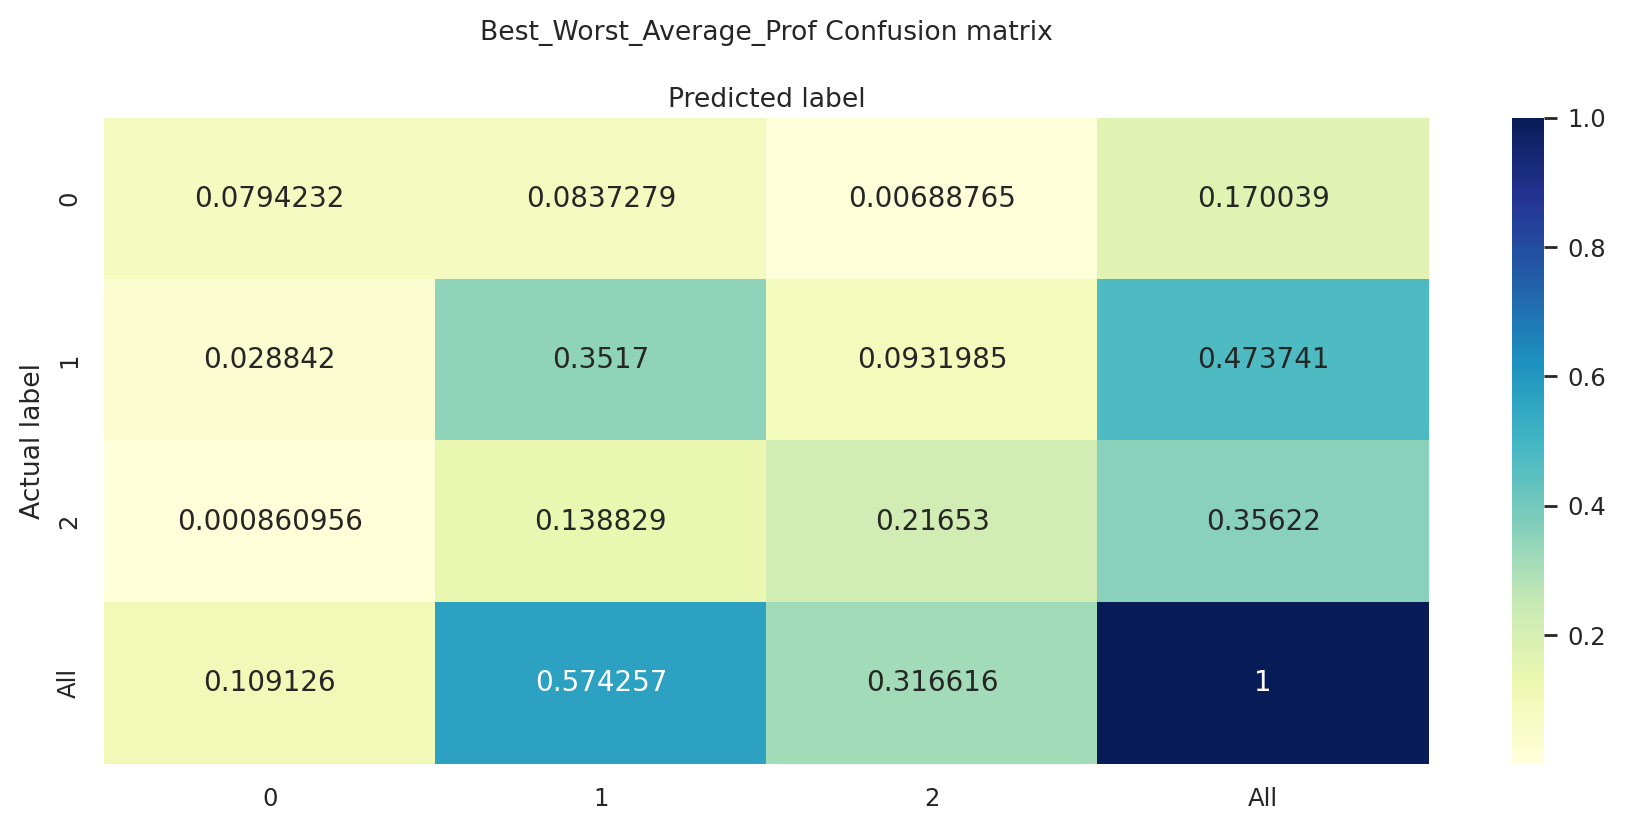

In [ ]:
# normalized confusion matrix
cm = pd.crosstab(y4_test,y4_pred,rownames=['True'],colnames=['Predicted'], normalize=True, margins = True)

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(9,4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Best_Worst_Average_Prof Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

2. Classification Report

In [ ]:
# generate and print the classification report for model 3
print(classification_report(y4_test,y4_pred))
print("\nAccuracy:", metrics.accuracy_score(y4_test, y4_pred))
print('Precision Score',metrics.precision_score(y4_test,y4_pred, average="weighted"))
print('Recall Score', metrics.recall_score(y4_test,y4_pred, average="weighted"))
print('F1 Score',metrics.f1_score(y4_test,y4_pred, average="weighted"))

              precision    recall  f1-score   support

           0       0.73      0.47      0.57       790
           1       0.61      0.74      0.67      2201
           2       0.68      0.61      0.64      1655

    accuracy                           0.65      4646
   macro avg       0.67      0.61      0.63      4646
weighted avg       0.66      0.65      0.64      4646


Accuracy: 0.6476538958243651
Precision Score 0.6575106878793101
Recall Score 0.6476538958243651
F1 Score 0.6439963164721497


3. K-Fold Cross Validation

In [ ]:
folds = [10,25, 50, 100]
means = list()
Best_Worst_Average_Prof_Cv = LogisticRegression(multi_class='multinomial', solver='newton-cg')
X4 = vector_tfidf
Y4 = d4['student_star']

for i in folds: 
  kf = KFold(n_splits= i, random_state=None)
  result_Best_Worst_Average_Prof_Cv = cross_val_score(Best_Worst_Average_Prof_Cv , X4, Y4, cv = kf)
  print("\nFor ", i, "folds: \n")
  print("Accuracy of each fold: \n", result_Best_Worst_Average_Prof_Cv)
  print("\nAverage accuracy: {}".format(result_Best_Worst_Average_Prof_Cv.mean()))


For  10 folds: 

Accuracy of each fold: 
 [0.65196342 0.64658419 0.66254037 0.64962325 0.65446717 0.64854682
 0.64585576 0.61141012 0.65500538 0.61141012]

Average accuracy: 0.6437406594399225

For  25 folds: 

Accuracy of each fold: 
 [0.65188172 0.65860215 0.66935484 0.61962366 0.67069892 0.68817204
 0.6733871  0.62314939 0.66487214 0.63257066 0.65679677 0.63660834
 0.62584118 0.6473755  0.6756393  0.64468371 0.61103634 0.65006729
 0.6218035  0.6204576  0.64468371 0.65410498 0.64468371 0.59623149
 0.60699865]

Average accuracy: 0.6435729894788637

For  50 folds: 

Accuracy of each fold: 
 [0.63709677 0.66666667 0.66935484 0.64784946 0.66397849 0.66666667
 0.6155914  0.61827957 0.65322581 0.69354839 0.7311828  0.6344086
 0.67473118 0.67473118 0.60215054 0.64784946 0.66666667 0.66666667
 0.65860215 0.59946237 0.67741935 0.65591398 0.63172043 0.64247312
 0.64516129 0.59139785 0.67204301 0.61021505 0.63978495 0.72043011
 0.64516129 0.62903226 0.60916442 0.61455526 0.69272237 0.61725067


# Learning Task 4: Naive Bayes Algorithm (Binomial Classification)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_Is_Good_Prof = MultinomialNB()
naive_bayes_Is_Good_Prof.fit(x1_train,y1_train)
class_predict_naive_bayes_Is_Good_Prof = naive_bayes_Is_Good_Prof.predict(x1_test)

# Results Learning Task 4 (naive_bayes_Is_Good_Prof)

In [ ]:
# get array of words from tfidf vectors
words = vectorizer_tfidf1.get_feature_names()
print("Words list length: ", len(words))
print("TF-IDF array size: ",vector_tfidf_binary.toarray().size)
# get list of coefficients from model 
coeff = naive_bayes_Is_Good_Prof.feature_log_prob_
print("Coefficients array size: ", coeff.size)
print(coeff.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Words list length:  16680
TF-IDF array size:  270566280
Coefficients array size:  33360
(2, 16680)


In [ ]:
# Output array of top 10 words with the highest coefficients for good and bad profs 
good_bad = [0,1]
good_bad_string = ["Bad", "Good"]
words = np.array(words)
for i in good_bad: 
  idx = np.argsort(coeff[i])
  idx = idx[-10:]
  print ("\nTop 10 words with highest coefficients for class label =", good_bad_string[i], ": ")
  print (words[idx])


Top 10 words with highest coefficients for class label = Bad : 
['professor' 'student' 'like' 'worst' 'doesnt' 'teacher' 'hard' 'test'
 'dont' 'class']

Top 10 words with highest coefficients for class label = Good : 
['make' 'lot' 'good' 'really' 'best' 'easy' 'professor' 'teacher' 'great'
 'class']


# Model Evaluation Learning Task 4 (naive_bayes_Is_Good_Prof)

**Multinomial Classification: naive_bayes_Is_Good_Prof**


---



In [ ]:
y5_pred = class_predict_naive_bayes_Is_Good_Prof

1. Confusion Matrix

Text(0.5, 41.83333333333333, 'Predicted label')

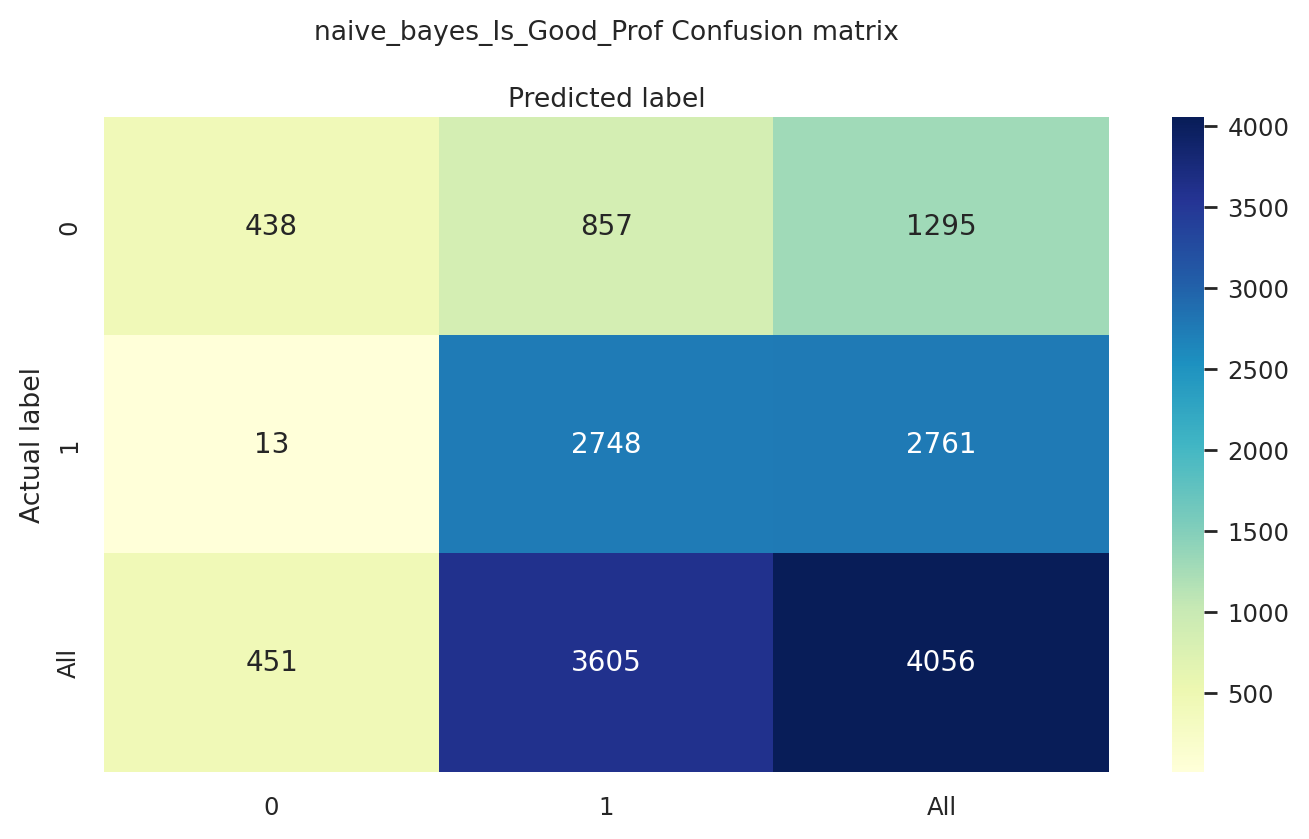

In [ ]:
# regular confusion matrix 
cm = pd.crosstab(y1_test,y5_pred,rownames=['True'],colnames=['Predicted'],margins=True)

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('naive_bayes_Is_Good_Prof Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 41.83333333333333, 'Predicted label')

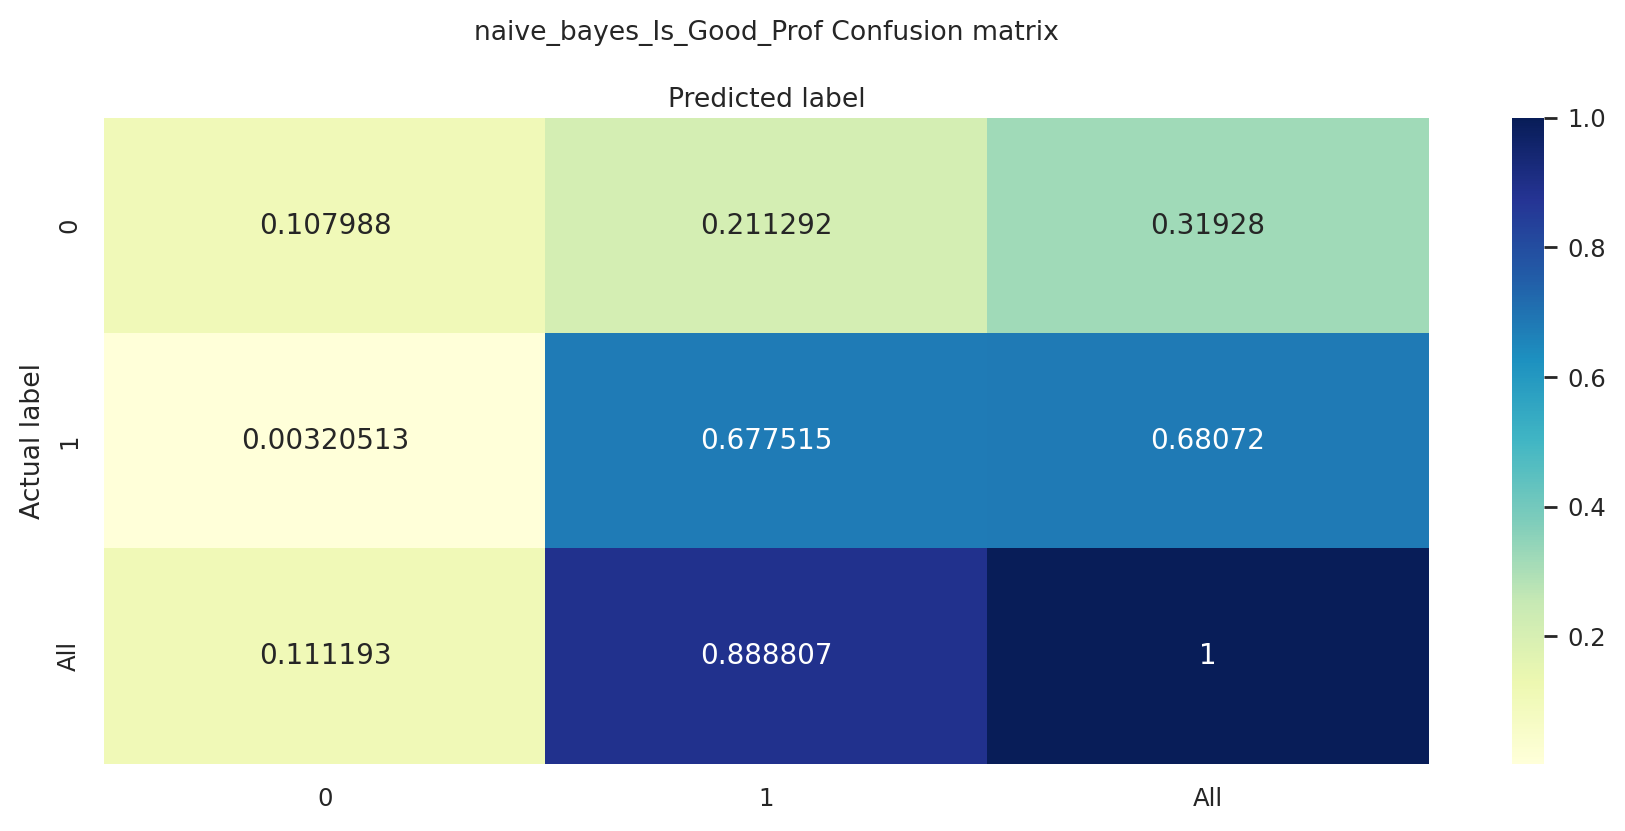

In [ ]:
# normalized confusion matrix
cm = pd.crosstab(y1_test,y5_pred,rownames=['True'],colnames=['Predicted'], normalize=True, margins = True)

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(9,4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('naive_bayes_Is_Good_Prof Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

2. Classification Report

In [ ]:
# generate and print the classification report for model 3
print(classification_report(y1_test,y5_pred))
print("\nAccuracy:", metrics.accuracy_score(y1_test, y5_pred))
print('Precision Score',metrics.precision_score(y1_test,y5_pred, average="weighted"))
print('Recall Score', metrics.recall_score(y1_test,y5_pred, average="weighted"))
print('F1 Score',metrics.f1_score(y1_test,y5_pred, average="weighted"))

              precision    recall  f1-score   support

           0       0.97      0.34      0.50      1295
           1       0.76      1.00      0.86      2761

    accuracy                           0.79      4056
   macro avg       0.87      0.67      0.68      4056
weighted avg       0.83      0.79      0.75      4056


Accuracy: 0.7855029585798816
Precision Score 0.8289724019400334
Recall Score 0.7855029585798816
F1 Score 0.7478789678132913


3. K-Fold Cross Validation

In [ ]:
folds = [10,25, 50, 100]
means = list()
naive_bayes_Is_Good_Prof_Cv = MultinomialNB()
X5 = vector_tfidf_binary
Y5 = d1['student_star']

for i in folds: 
  kf = KFold(n_splits= i, random_state=None)
  result_naive_bayes_Is_Good_Prof_Cv = cross_val_score(naive_bayes_Is_Good_Prof_Cv , X5, Y5, cv = kf)
  print("\nFor ", i, "folds: \n")
  print("Accuracy of each fold: \n", result_naive_bayes_Is_Good_Prof_Cv)
  print("\nAverage accuracy: {}".format(result_naive_bayes_Is_Good_Prof_Cv.mean()))


For  10 folds: 

Accuracy of each fold: 
 [0.7689464  0.77496917 0.80394575 0.82490752 0.81196054 0.79346486
 0.77496917 0.7946979  0.81381011 0.82922318]

Average accuracy: 0.7990894607647618

For  25 folds: 

Accuracy of each fold: 
 [0.7596302  0.77657935 0.80431433 0.79506934 0.75654854 0.80123267
 0.80893683 0.81047766 0.81510015 0.84437596 0.79198767 0.82434515
 0.85208012 0.78428351 0.79661017 0.80893683 0.73035439 0.79969183
 0.79969183 0.81510015 0.81664099 0.83024691 0.81018519 0.83641975
 0.81481481]

Average accuracy: 0.8033461736004109

For  50 folds: 

Accuracy of each fold: 
 [0.78769231 0.75076923 0.72615385 0.83384615 0.80615385 0.80923077
 0.78153846 0.81230769 0.74153846 0.77230769 0.80923077 0.8
 0.78461538 0.83076923 0.81538462 0.82153846 0.82769231 0.8
 0.82461538 0.85846154 0.80923077 0.77160494 0.83024691 0.83950617
 0.84567901 0.85493827 0.80864198 0.75308642 0.82098765 0.78395062
 0.80555556 0.79938272 0.70987654 0.7654321  0.82407407 0.77160494
 0.83024691 0

# Learning Task 5: Naive Bayes Algorithm (Multinomial Classification)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_Prof_Star_Rating = MultinomialNB()
naive_bayes_Prof_Star_Rating.fit(x3_train,y3_train)
class_predict_naive_bayes_Prof_Star_Rating = naive_bayes_Prof_Star_Rating.predict(x3_test)

# Results Learning Task 5 (naive_bayes_Prof_Star_Rating)

In [ ]:
# get array of words from tfidf vectors
words = vectorizer_tfidf2.get_feature_names()
print("Words list length: ", len(words))
print("TF-IDF array size: ",vector_tfidf.toarray().size)
# get list of coefficients from model 
coeff = naive_bayes_Prof_Star_Rating.feature_log_prob_
print("Coefficients array size: ", coeff.size)
print(coeff.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Words list length:  18100
TF-IDF array size:  336334200
Coefficients array size:  90500
(5, 18100)


In [ ]:
# Output array of top 10 words with the highest coefficients for good and bad profs 
star_ratings = [0,1,2,3,4]
words = np.array(words)
for i in star_ratings: 
  idx = np.argsort(coeff[i])
  idx = idx[-10:]
  print ("\nTop 10 words with highest coefficients for student_star=", i+1, ": ")
  print (words[idx])


Top 10 words with highest coefficients for student_star= 1 : 
['test' 'hard' 'teach' 'professor' 'student' 'doesnt' 'teacher' 'dont'
 'worst' 'class']

Top 10 words with highest coefficients for student_star= 2 : 
['good' 'boring' 'time' 'dont' 'grade' 'lecture' 'like' 'hard' 'test'
 'class']

Top 10 words with highest coefficients for student_star= 3 : 
['time' 'nice' 'lot' 'lecture' 'really' 'easy' 'hard' 'good' 'test'
 'class']

Top 10 words with highest coefficients for student_star= 4 : 
['hard' 'lot' 'test' 'professor' 'really' 'teacher' 'good' 'great' 'easy'
 'class']

Top 10 words with highest coefficients for student_star= 5 : 
['help' 'student' 'make' 'really' 'easy' 'best' 'professor' 'teacher'
 'great' 'class']


In [ ]:
# Output array of words with the lowest coefficients 
for i in star_ratings:
  neg_idx = np.argsort(coeff[i])
  neg_idx = neg_idx[:10]
  print ("\nTop 10 words with lowest coefficients for star_rating = ", i+1, ": ")
  print (words[neg_idx])


Top 10 words with lowest coefficients for star_rating =  1 : 
['00' 'myuniverse' 'mz' 'nacc' 'nad' 'nada' 'nag' 'nagging' 'nailed'
 'nait']

Top 10 words with lowest coefficients for star_rating =  2 : 
['00' 'nowhe' 'nowin' 'nowself' 'noy' 'np' 'npv' 'npvc' 'nsc' 'nscc']

Top 10 words with lowest coefficients for star_rating =  3 : 
['00' 'nonsci' 'nonsense' 'nonsensical' 'nonsince' 'nontechnical'
 'nontextbooky' 'nonthreatening' 'nonviolent' 'nonwestern']

Top 10 words with lowest coefficients for star_rating =  4 : 
['zzzzzwhere' 'homeworkpaper' 'homeworkpractice' 'sarna'
 'homeworkquizzestests' 'sargent' 'homeworkshe' 'homeworksome'
 'sarcastici' 'sarcastically']

Top 10 words with lowest coefficients for star_rating =  5 : 
['00' 'mineral' 'minibooks' 'minilecture' 'minilectures' 'minimum'
 'miniquiz' 'minitest' 'minitests' 'minium']


# Model Evaluation Learning Task 5 (naive_bayes_Prof_Star_Rating)

**Multinomial Classification: naive_bayes_Professor_Star_Rating**


---



In [ ]:
y6_pred = class_predict_naive_bayes_Prof_Star_Rating

1. Confusion Matrix

Text(0.5, 41.83333333333333, 'Predicted label')

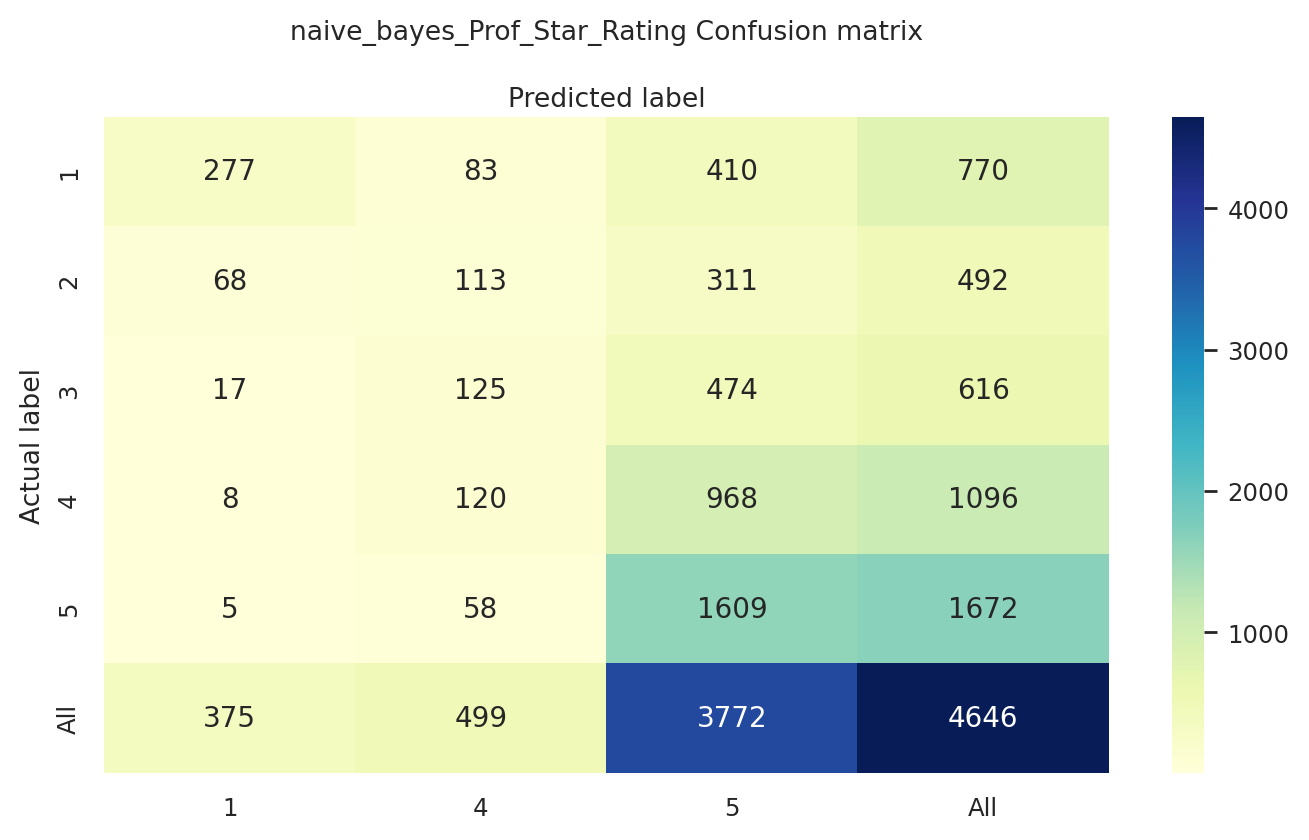

In [ ]:
# regular confusion matrix 
cm = pd.crosstab(y3_test,y6_pred,rownames=['True'],colnames=['Predicted'],margins=True)

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(7,4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('naive_bayes_Prof_Star_Rating Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 41.83333333333333, 'Predicted label')

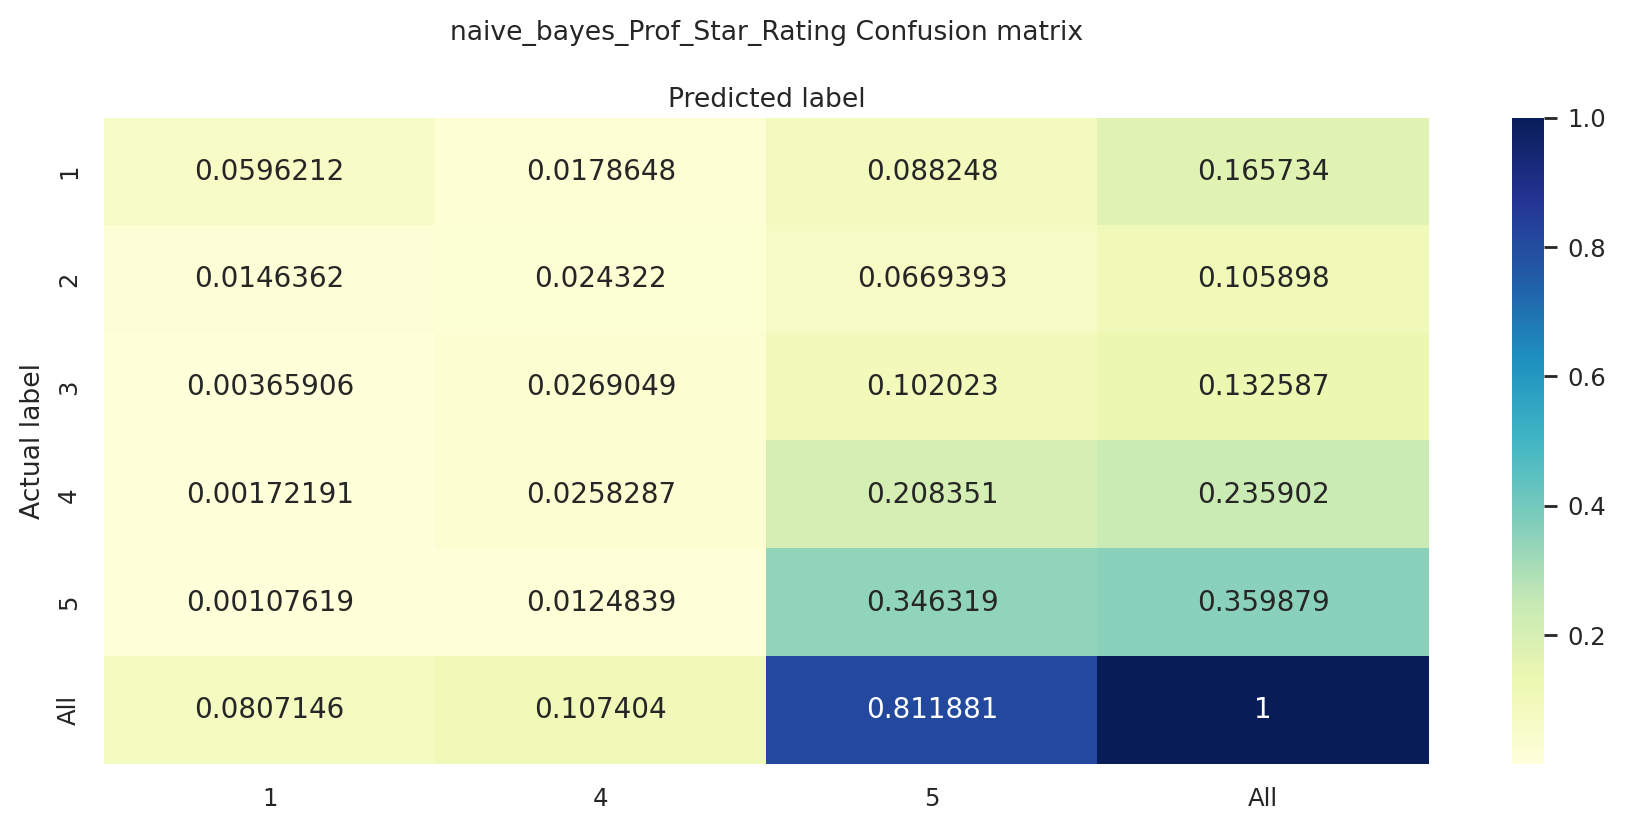

In [ ]:
# normalized confusion matrix
cm = pd.crosstab(y3_test,y6_pred,rownames=['True'],colnames=['Predicted'], normalize=True, margins = True)

plt.rcParams['figure.dpi'] = 200
fig, ax = plt.subplots(figsize=(9,4))
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('naive_bayes_Prof_Star_Rating Confusion matrix\n', y=1.1)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

2. Classification Report

In [ ]:
# generate and print the classification report for model 3
print(classification_report(y3_test,y6_pred))
print("\nAccuracy:", metrics.accuracy_score(y3_test, y6_pred))
print('Precision Score',metrics.precision_score(y3_test,y6_pred, average="weighted"))
print('Recall Score', metrics.recall_score(y3_test,y6_pred, average="weighted"))
print('F1 Score',metrics.f1_score(y3_test,y6_pred, average="weighted"))

              precision    recall  f1-score   support

           1       0.74      0.36      0.48       770
           2       0.00      0.00      0.00       492
           3       0.00      0.00      0.00       616
           4       0.24      0.11      0.15      1096
           5       0.43      0.96      0.59      1672

    accuracy                           0.43      4646
   macro avg       0.28      0.29      0.25      4646
weighted avg       0.33      0.43      0.33      4646


Accuracy: 0.43176926388291004
Precision Score 0.3326637404251925
Recall Score 0.43176926388291004
F1 Score 0.32841355149066587


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

3. K-Fold Cross Validation

In [ ]:
folds = [10,25, 50, 100]
means = list()
naive_bayes_Prof_Star_Rating_Cv = LogisticRegression(multi_class='multinomial', solver='newton-cg')
X6 = vector_tfidf
Y6 = df['student_star']

for i in folds: 
  kf = KFold(n_splits= i, random_state=None)
  result_naive_bayes_Prof_Star_Rating_Cv = cross_val_score(naive_bayes_Prof_Star_Rating_Cv , X6, Y6, cv = kf)
  print("\nFor ", i, "folds: \n")
  print("Accuracy of each fold: \n", result_naive_bayes_Prof_Star_Rating_Cv)
  print("\nAverage accuracy: {}".format(result_naive_bayes_Prof_Star_Rating_Cv.mean()))


For  10 folds: 

Accuracy of each fold: 
 [0.50457235 0.49919311 0.52744887 0.50753498 0.52691066 0.5247578
 0.50592034 0.49677072 0.49623251 0.51345533]

Average accuracy: 0.5102796681665606

For  25 folds: 

Accuracy of each fold: 
 [0.50672043 0.51747312 0.52419355 0.50537634 0.46774194 0.53494624
 0.50268817 0.49798116 0.50471063 0.51547779 0.54643338 0.50605653
 0.54508748 0.49528937 0.54239569 0.52489906 0.48855989 0.47240915
 0.48452221 0.50201884 0.49663526 0.51009421 0.5141319  0.51816958
 0.48183042]

Average accuracy: 0.5082336936858709

For  50 folds: 

Accuracy of each fold: 
 [0.52419355 0.50268817 0.50537634 0.52688172 0.50537634 0.55107527
 0.49193548 0.52419355 0.47849462 0.47043011 0.54301075 0.53494624
 0.5188172  0.48924731 0.53494624 0.47580645 0.5188172  0.49731183
 0.50268817 0.53763441 0.56451613 0.52688172 0.50268817 0.51344086
 0.52956989 0.56989247 0.51344086 0.46774194 0.54032258 0.55913978
 0.57258065 0.47580645 0.5309973  0.4393531  0.47978437 0.47169811
